In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as npfrom scipy.stats
#import normfrom sklearn.preprocessing
#import StandardScalerfrom scipy
#import stat#
import warnings
%matplotlib inline
import lightgbm as lgb
import pandas as pd

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler()

In [0]:
!pip install xgboost
import xgboost as xgb
from sklearn.decomposition import TruncatedSVD
import gc
n_compo = 10
tsvd = TruncatedSVD(n_components=n_compo,n_iter=45)
n_compo2 = 5
tsvd2 = TruncatedSVD(n_components=n_compo2,n_iter=45)
lbl = LabelEncoder()
pd.set_option('max_column',None)
pd.set_option('max_row',500)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold

#### 读取数据

In [0]:
import numpy as np
import pandas as pd
import sys
import re

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
#gz文件不需要解压缩，强大的Pandas 内置的解压功能。
#train.describe()
#combined = pd.concat([train,test],axis =0, ignore_index =True)
train = train_data[(train_data['id']!=5776)].reset_index(drop = True) #delete max price (1200000 and )

train.loc[train_data['id'] == 20927,'面積'] = '43.01m2'
train.loc[train_data['id'] == 7492,'面積'] = '58.3m2'
test_data.loc[test_data['id'] == 39954,'間取り'] = '1R'
dataset = pd.concat([train,test_data],axis = 0).reset_index(drop = True)
cate_cols = []
useless_columns = []
dataset.iloc(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [0]:
train.head()

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe295374160>,
      dtype=object)

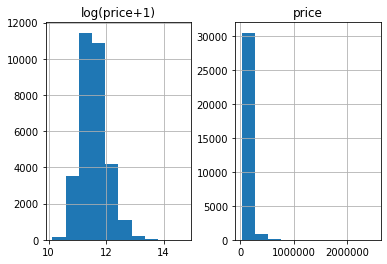

In [0]:
prices = pd.DataFrame({'price': train['賃料'], 'log(price+1)': np.log1p(train['賃料'])})
prices.hist()

In [0]:
#查看数据类型
# train.info()
# test.info()

### 绘制价格分布图

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26009 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 36035 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26009 missing from current font.
  font.set_text(s, 0, flags=flags)


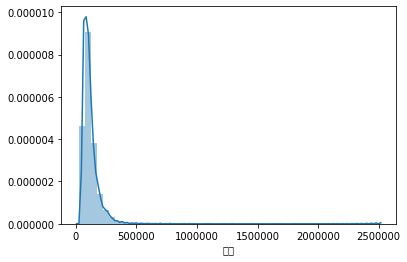

In [0]:
sns.distplot(train['賃料'])

#### 价格-面积散点图

In [0]:
# var = '面積'
# data = pd.concat([train['賃料'], train[var]], axis=1)
# data.plot.scatter(x=var, y='賃料', ylim=(0,800000));


>查看缺失值

In [0]:
#缺失值统计
train_null = train.isnull().sum(axis=0)
print(train_null) 



id           0
賃料           0
所在地          0
アクセス         0
間取り          0
築年数          0
方角        2749
面積           0
所在階          0
バス・トイレ     329
キッチン       621
放送・通信     3440
室内設備        82
駐車場       5287
周辺環境      9432
建物構造         0
契約期間      7120
dtype: int64


In [0]:
#test数据的缺失值。 
test_null = test_data.isnull().sum(axis=0)
print(test_null) 
test_data['築年数'].value_counts()

id           0
所在地          0
アクセス         0
間取り          0
築年数          0
方角        2808
面積           0
所在階          1
バス・トイレ     320
キッチン       635
放送・通信     3454
室内設備        73
駐車場       5356
周辺環境      9241
建物構造         0
契約期間      6981
dtype: int64


0年1ヶ月      902
新築         850
0年0ヶ月      671
0年2ヶ月      629
0年3ヶ月      489
          ... 
65年9ヶ月       1
55年6ヶ月       1
59年11ヶ月      1
62年0ヶ月       1
71年10ヶ月      1
Name: 築年数, Length: 734, dtype: int64

### 标签映射 lableencoder
例子：
```
from sklearn import preprocessing``
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"]);
le.transform(["tokyo", "tokyo", "paris", "amsterdam", "amsterdam"]) 
```


In [0]:
#再次查看数据类型
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31469 entries, 0 to 31468
Data columns (total 17 columns):
id        31469 non-null int64
賃料        31469 non-null int64
所在地       31469 non-null object
アクセス      31469 non-null object
間取り       31469 non-null object
築年数       31469 non-null object
方角        28720 non-null object
面積        31469 non-null object
所在階       31469 non-null object
バス・トイレ    31140 non-null object
キッチン      30848 non-null object
放送・通信     28029 non-null object
室内設備      31387 non-null object
駐車場       26182 non-null object
周辺環境      22037 non-null object
建物構造      31469 non-null object
契約期間      24349 non-null object
dtypes: int64(2), object(15)
memory usage: 4.1+ MB


In [0]:
# lable_encoder = preprocessing.LabelEncoder()
# #間取り
# lable_encoder = preprocessing.LabelEncoder()
# lable_encoder.fit(dataset["間取り"].values )
# dataset["間取り"] = lable_encoder.transform(dataset["間取り"])


In [0]:
####方向####
angle = dataset['方角']
angle.fillna('南', inplace=True)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(angle);
angle_final = le.transform(angle)
dataset['方角'] = angle_final



In [0]:
# #import re
# #ss= '44年10ヶ月'
# s = re.findall("\d+",str(train["築年数"][4:10]))[0]
# s2 = re.findall("\d+",str(train["築年数"][4:10]))[1]
# s3 = re.findall("\d+",str(train["築年数"][4:10]))[2]
# print(s,s2,s3)
# print(int(s2)*12+int(s3))
# train["築年数"][4:10] = int(s2)*12+int(s3)
# train["築年数"][4:10]
# dataset['築年数']=dataset['築年数'].str.replace('年','.')
# dataset['築年数']=dataset['築年数'].str.strip('ヶ月')
# dataset['築年数']=dataset['築年数'].str.replace('新築','0.0')


# 建筑时间包括新建筑(新築)，目前设置为0年0月
dataset['建筑时间-年'] = dataset['築年数'].apply(lambda x:int(x.split('年')[0]) if x !='新築' else 0)
dataset['建筑时间-月'] = dataset['築年数'].apply(lambda x:int(x.split('年')[1].split('ヶ')[0]) if x !='新築' else 0)
dataset['建筑时间-年月'] = dataset['建筑时间-年']*12+dataset['建筑时间-月']



In [0]:
####所在地####

# ku = dataset['所在地']
# a = np.array(ku)
# for i in range(len(a)):
#     a[i] = a[i].split('区')[0]
    
# ku_d = pd.DataFrame(a)

# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(ku_d);
# ku_final = le.transform(ku_d)
# dataset['所在地'] = ku_final
dataset['区'] = dataset['所在地'].apply(lambda x:x.split('区')[0]+'区')

In [0]:
####车站####
dataset['最近路线-count'] = dataset['アクセス'].apply(lambda x:len(x.split('\t\t')))
dataset['最近地铁线路'] = dataset['アクセス'].apply(lambda x:[i.split('\t')[0] if '\t' in i else 'nan' for i in x.split('\t\t')])
dataset['最近地铁线路'] = dataset['最近地铁线路'].apply(lambda x:",".join(x))
countvectorizer = CountVectorizer()
tmp = pd.DataFrame(countvectorizer.fit_transform(dataset['最近地铁线路']).toarray(),columns = countvectorizer.get_feature_names())
tmp = pd.DataFrame(tsvd.fit_transform(tmp),columns = [str(i)+'_线路' for i in range(n_compo)])
dataset = pd.concat([dataset,tmp],axis = 1)
del tmp,dataset['最近地铁线路']



# 针对地铁站做加权以及到站口的时间
def railwayStaion(x):
    result = []
    for i in x.split('\t\t'):
        tmp = re.findall('.*駅',i)
        if len(tmp)!=0:
            result.append(tmp[0])
        else:
            result.append(x.split('\t')[1])
    return result
dataset['最近地铁站'] = dataset['アクセス'].apply(railwayStaion)
dataset['最短时间'] = dataset['アクセス'].apply(lambda x:re.findall(r'徒歩\d+',x))
dataset['最短时间'] = dataset['最短时间'].apply(lambda x:[int(re.findall(r'\d+',i)[0]) for i in x])
dataset['min-时间'] = dataset['最短时间'].apply(lambda x:np.min(x))
dataset['mean-时间'] = dataset['最短时间'].apply(lambda x:np.mean(x))
dataset['max-时间'] = dataset['最短时间'].apply(lambda x:np.max(x))
dataset['std-时间'] = dataset['最短时间'].apply(lambda x:np.std(x))
def countStation(row):
    station = row['最近地铁站']
    time = row['最短时间']
    result = []
    for i in range(min(len(time),len(station))):
        result.append((station[i].replace('\t','')+",")*time[i])
    return result
dataset['最近地铁站加权'] = dataset.apply(countStation,axis = 1)
dataset['最近地铁站加权'] = dataset['最近地铁站加权'].apply(lambda x:"".join(x))
countvectorizer = CountVectorizer()
tmp = pd.DataFrame(countvectorizer.fit_transform(dataset['最近地铁站加权']).toarray(),columns = countvectorizer.get_feature_names())
tmp = pd.DataFrame(tsvd.fit_transform(tmp),columns = [str(i)+'_最近地铁站加权' for i in range(n_compo)])
dataset = pd.concat([dataset,tmp],axis = 1)
del tmp,dataset['最近地铁站加权'],dataset['最近地铁站'],dataset['最短时间']

In [0]:
####面积####
# area = dataset['面積']
# a = np.array(area)
# for i in range(len(a)):
#     a[i] = a[i].split('m')[0]
    
# area_d = pd.DataFrame(a)
# dataset['面積'] = area_d
dataset['面积'] = dataset['面積'].apply(lambda x:float(x[:-2]))

In [0]:
# 层数
def allStage(x):
    tmp = re.findall(r'\d+階建',x)
    if len(tmp) == 0:
        return np.nan
    else:
        return int(re.findall(r'\d+',tmp[0])[0])
def thisStage(x):
    tmp = re.findall(r'\d+',x)
    if len(tmp) == 0:
        return np.nan
    return int(tmp[0])
    
dataset['地上总层'] = dataset['所在階'].astype(str).apply(lambda x:x.replace('地下','-')).apply(allStage)
dataset['所在层'] = dataset['所在階'].astype(str).apply(lambda x:x.replace('地下','-')).apply(thisStage)



In [0]:
# 厕所浴室-バス・トイレ
dataset['浴室-厕所'] = dataset['バス・トイレ'].astype(str).apply(lambda x:x.replace('／','').replace('\t',','))
countvectorizer = CountVectorizer()
tmp = pd.DataFrame(countvectorizer.fit_transform(dataset['浴室-厕所']).toarray(),columns = countvectorizer.get_feature_names())
dataset = pd.concat([dataset,tmp],axis = 1)
print(tmp.shape)
del tmp,dataset['浴室-厕所']

(62731, 15)


In [0]:
# 周边环境
dataset['周边环境'] = dataset['周辺環境'].astype(str).apply(lambda x:x.split('\t'))
dataset['周边环境'] = dataset['周边环境'].apply(lambda x:[i.split(' ')[0] for i in x])
dataset['周边环境'] = dataset['周边环境'].apply(lambda x:",".join(x))
countvectorizer = CountVectorizer()
tmp = pd.DataFrame(countvectorizer.fit_transform(dataset['周边环境']).toarray(),columns = countvectorizer.get_feature_names())
# tmp = pd.DataFrame(tsvd2.fit_transform(tmp),columns = [str(i)+'_周边环境' for i in range(n_compo2)])
dataset = pd.concat([dataset,tmp],axis = 1)
print(tmp.shape)
del tmp,dataset['周边环境']

(62731, 21)


In [0]:
# 契约时间
def contract(x):
    # return [按截止日期或者按时间，年，月，年間，月間，是否物件，是否定期借家]
    base = [0,0,0,0,0,0,0]
    if x == 'nan':
        return [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
    if '年間' in x:
        tmp = int(re.findall(r"\d+年間",x)[0].split('年間')[0])
        base[3] += tmp
    if 'ヶ月間' in x:
        tmp = int(re.findall(r"\d+ヶ月間",x)[0].split('ヶ月間')[0])
        base[4] += tmp
    if '月ま' in x:
        tmp = int(re.findall(r"\d+年",x)[0].split('年')[0])
        base[0] = 1
        base[1] += tmp
        tmp = int(re.findall(r"\d+月",x)[0].split('月')[0])
        base[2] += tmp
    if '※この物件は' in x:
        base[-2] += 1
    if '定期借家' in x:
        base[-1] += 1
    return base
dataset['契约时间'] = dataset['契約期間'].astype(str).apply(contract)
dataset['按截止日期或者按时间'] = dataset['契约时间'].apply(lambda x:x[0])
dataset['年'] = dataset['契约时间'].apply(lambda x:x[1])
dataset['月'] = dataset['契约时间'].apply(lambda x:x[2])
dataset['年間'] = dataset['契约时间'].apply(lambda x:x[3])
dataset['月間'] = dataset['契约时间'].apply(lambda x:x[4])
dataset['是否物件'] = dataset['契约时间'].apply(lambda x:x[5])
dataset['是否定期借家'] = dataset['契约时间'].apply(lambda x:x[6])
dataset['年月間'] = dataset['年間']+12*dataset['月間']
del dataset['契约时间']

In [0]:
# 厨房设备-キッチン
def stove(x):
    tmp = re.findall(r'ロ\d+口',x)
    if len(tmp) == 0:
        return 0
    else:
        return int(re.findall(r'\d+',tmp[0])[0])
dataset['锅灶数'] = dataset['室内設備'].astype(str).apply(stove)
dataset['厨房设备'] = dataset['キッチン'].astype(str).apply(lambda x:x.replace('／','').replace('\t',','))
countvectorizer = CountVectorizer()
tmp = pd.DataFrame(countvectorizer.fit_transform(dataset['厨房设备']).toarray(),columns = countvectorizer.get_feature_names())
# tmp = pd.DataFrame(tsvd2.fit_transform(tmp),columns = [str(i)+'_厨房设备' for i in range(n_compo2)])
dataset = pd.concat([dataset,tmp],axis = 1)
print(tmp.shape)
del tmp,dataset['厨房设备']

(62731, 16)


In [0]:
# 互联网通信-放送・通信
dataset['互联网通信'] = dataset['放送・通信'].astype(str).apply(lambda x:x.replace('／','').replace('\t',','))
countvectorizer = CountVectorizer()
tmp = pd.DataFrame(countvectorizer.fit_transform(dataset['互联网通信']).toarray(),columns = countvectorizer.get_feature_names())
# tmp = pd.DataFrame(tsvd2.fit_transform(tmp),columns = [str(i)+'_互联网通信' for i in range(n_compo2)])
dataset = pd.concat([dataset,tmp],axis = 1)
print(tmp.shape)
del tmp,dataset['互联网通信']

(62731, 9)


In [0]:
# 房间设施-室内設備
dataset['房间设施'] = dataset['室内設備'].astype(str).apply(lambda x:x.replace('／','').replace('\t',','))
countvectorizer = CountVectorizer()
tmp = pd.DataFrame(countvectorizer.fit_transform(dataset['房间设施']).toarray(),columns = countvectorizer.get_feature_names())
# tmp = pd.DataFrame(tsvd2.fit_transform(tmp),columns = [str(i)+'_房间设施' for i in range(n_compo2)])
dataset = pd.concat([dataset,tmp],axis = 1)
print(tmp.shape)
del tmp,dataset['房间设施']

(62731, 43)


In [0]:
####建物構造####
material = dataset['建物構造']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(material);
material_final = le.transform(material)
dataset['建物構造'] = material_final



In [0]:
# 停车场特征
def carPark(x):
    # [駐輪場，駐車場，バイク置き場]
    result = [0,0,0]
    if len(re.findall(r'駐輪場',x)) == 0:
        result[0] = 1
    if len(re.findall(r'駐車場',x)) == 0:
        result[1] = 1
    if len(re.findall(r'バイク置き場',x)) == 0:
        result[2] = 1
    return result
dataset['停车场'] = dataset['駐車場'].astype(str).apply(carPark)
dataset['駐輪場'] = dataset['停车场'].apply(lambda x:x[0]).astype(int)
dataset['停車場'] = dataset['停车场'].apply(lambda x:x[1]).astype(int)
dataset['バイク置き場'] = dataset['停车场'].apply(lambda x:x[2]).astype(int)
del dataset['停车场']


# 停车费
def park_fee(x):
    tmp = re.findall(r'\d+,\d+円',x)
    if len(tmp) == 0:
        return 0
    else:
        tmp = tmp[0].split(',')
        fee1 = float(tmp[0])
        fee2 = float(tmp[1].split('円')[0])
        return fee1*1000+fee2
dataset['park_fee'] = dataset['駐車場'].astype(str).apply(park_fee)



In [0]:
# 户型 改修済み
def houseType(x):
    # [卧室,厨房,桌椅，客厅,杂物]
    room = [0,0,0,0,0]
    #base = x.split('')[0]
    #num = int(base[0])
    num = int(x[0])
    base = x
    #1Rの場合
    if base == '1R':
      room[0]+=num
    #それ以外の場合：XLDK,XK,XDK,....
    else:
      room[0]+=num
      if 'K' in base:
          room[1]+=1
      if 'D' in base:
          room[2]+=1
      if 'L' in base:
          room[3]+=1
      if 'S' in base:
          room[4]+=1
    return room
dataset['房间'] = dataset['間取り'].apply(houseType)
dataset['卧室'] = dataset['房间'].apply(lambda x:x[0])
dataset['厨房'] = dataset['房间'].apply(lambda x:x[1])
dataset['桌椅'] = dataset['房间'].apply(lambda x:x[2])
dataset['客厅'] = dataset['房间'].apply(lambda x:x[3])
dataset['杂物'] = dataset['房间'].apply(lambda x:x[4])
del dataset['房间']

In [0]:
useless_columns = ['id','nan','アクセス', '契約期間', '所在地','面積','周辺環境', '駐車場','室内設備', '放送・通信', '築年数','間取り']
trainset = dataset[~dataset['賃料'].isna()].reset_index(drop = True).drop(useless_columns,axis = 1)
testset = dataset[dataset['賃料'].isna()].reset_index(drop = True).drop(useless_columns,axis = 1)

features = trainset.drop('賃料',axis = 1)
labels = trainset['賃料']
test_features = testset.drop('賃料',axis = 1)


columns = ['キッチン', 'バス・トイレ', '所在階', '区']
for cate_col in columns:
    dataset[cate_col] = lbl.fit_transform(dataset[cate_col].astype(str))


In [0]:
# ####model####
# X = train.drop(['id', 'target'], axis=1)
# y = train['target']
# X_test = test.drop(['id'], axis=1)
# y_pred = np.zeros(X_test.shape[0], dtype='float32')
# train_pred = np.zeros(X.shape[0], dtype='float32')
# test_pred = np.zeros([X_test.shape[0],])

# cv_score = 0
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0,test_size=1)
# train_data = lgb.Dataset(X_train, y_train)
# valid_data = lgb.Dataset(X_valid, y_valid)
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'learning_rate': 0.02,
#     'max_depth': 7,
#     'bagging_fraction': 0.7,
#     'bagging_freq': 30,
#     'feature_fraction': 0.8,
#     'lambda_l1': 0.1,
#     'num_leaves': 127,
#     'max_bin': 255,
#     'colsample_bytree': 0.8,
#     'subsample': 0.8,
#     'nthread': -1,
#     'bagging_freq': 1,
#     'verbose': -1,
#     'seed': 1,
#     'lambda': 0.1,
#     'boosting_type': 'gbdt'
    
# }
# model = lgb.train(params, train_data, valid_sets=[train_data, valid_data],
#                   num_boost_round=10000, 
#                   verbose_eval=200)

# y_val_pred = model.predict(X_valid)
# val_score = np.sqrt(mean_squared_error(y_valid, y_val_pred))
# print('RMSE:', val_score)

# y_pred += model.predict(X_test, num_iteration=model.best_iteration)
# sub = test2
# sub['賃料'] = y_pred
# sub[['id','賃料']].to_csv("/content/baseline.csv",index = 0,header = 0)

params = {
    'learning_rate': 0.01,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'max_depth': 4,
    'num_leaves': 31,
    'max_depth':-1,
    'metric':'rmse'
}


test_pred = np.zeros([test_features.shape[0],])
dtrain = lgb.Dataset(features,labels,
                     categorical_feature=columns
                    )

model_lgb = lgb.train(
    params,
    dtrain,
    num_boost_round = 100000,
    valid_sets = [dtrain],
    verbose_eval = 100,
    categorical_feature=columns,
)
test_pred += model_lgb.predict(test_features)
train_pred = model_lgb.predict(features)

sub = test_data
sub['賃料'] = test_pred
sub[['id','賃料']].to_csv("/content/baseline.csv",index = 0,header = 0)

[100]	training's rmse: 36824.3
[200]	training's rmse: 24756.5
[300]	training's rmse: 20397.2
[400]	training's rmse: 18276.4
[500]	training's rmse: 16716.1
[600]	training's rmse: 15620.5
[700]	training's rmse: 14730.6
[800]	training's rmse: 13963.7
[900]	training's rmse: 13311.9
[1000]	training's rmse: 12750.3
[1100]	training's rmse: 12259.4
[1200]	training's rmse: 11822.5
[1300]	training's rmse: 11423.6
[1400]	training's rmse: 11067.7
[1500]	training's rmse: 10750
[1600]	training's rmse: 10460.7
[1700]	training's rmse: 10212.3
[1800]	training's rmse: 9975.26
[1900]	training's rmse: 9748.12
[2000]	training's rmse: 9545.54
[2100]	training's rmse: 9353.18
[2200]	training's rmse: 9175.03
[2300]	training's rmse: 9016.35
[2400]	training's rmse: 8863.76
[2500]	training's rmse: 8722.06
[2600]	training's rmse: 8587.86
[2700]	training's rmse: 8457.23
[2800]	training's rmse: 8333.88
[2900]	training's rmse: 8215.67
[3000]	training's rmse: 8105.58
[3100]	training's rmse: 7993.92
[3200]	training's r

# 相关系数矩阵

In [0]:
# cv_score = 0
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)
# params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
#                     'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
# model = xgb.XGBRegressor(**params)
# model.fit(X_train, y_train)
# y_val_pred = model.predict(X_valid)
# val_score = np.sqrt(mean_squared_error(y_valid, y_val_pred))
# print('RMSE:', val_score)

# y_pred += model.predict(X_test, num_iteration=model.best_iteration)

In [0]:
pip install wikipedia

In [0]:
import wikipedia
wikipedia.set_lang("ja")

In [0]:
wikipedia.page("横浜").content

/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


DisambiguationError: ignored

In [0]:
from lxml import etree
import urllib.request
import urllib.parse
'''
遇到不懂的问题？Python学习交流群：821460695满足你的需求，资料都已经上传群文件，可以自行下载！
'''
def query(content):
    # 请求地址
    url = 'https://en.wikipedia.org/wiki/' + content
    # 请求头部
    headers = { 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36' 
    }
    # 利用请求地址和请求头部构造请求对象
    req = urllib.request.Request(url=url, headers=headers, method='GET')
    # 发送请求，获得响应
    response = urllib.request.urlopen(req)
    # 读取响应，获得文本
    text = response.read().decode('utf-8')
    # 构造 _Element 对象
    html = etree.HTML(text)
    # 使用 xpath 匹配数据，得到 <div class="mw-parser-output"> 下所有的子节点对象
    obj_list = html.xpath('//div[@class="mw-parser-output"]/*')
    # 在所有的子节点对象中获取有用的 <p> 节点对象
    for i in range(0,len(obj_list)):
        if 'p' == obj_list[i].tag:
            start = i
            break
    for i in range(start,len(obj_list)):
        if 'p' != obj_list[i].tag:
            end = i
            break
    p_list = obj_list[start:end]
    # 使用 xpath 匹配数据，得到 <p> 下所有的文本节点对象
    sen_list_list = [obj.xpath('.//text()') for obj in p_list]
    # 将文本节点对象转化为字符串列表
    sen_list = [sen.encode('utf-8').decode() for sen_list in sen_list_list for sen in sen_list]
    # 过滤数据，去掉空白
    sen_list_after_filter = [item.strip('\n') for item in sen_list]
    # 将字符串列表连成字符串并返回
    return ''.join(sen_list_after_filter)

if __name__ == '__main__':
    while (True):
        content = input('Word: ')
        result = query(content)
        print("Result: %s" % result)

In [0]:
wikipediaSearch("横浜")

In [0]:
#encoding:utf-8
from selenium import webdriver
import time
host1="https://en.wikipedia.org/wiki/"
print"input several target name and input #GO#:"

    driver=webdriver.Firefox()
    driver.get(url)
    k=k+1

print 'done'